# Ejercicio 

El objetivo de este trabajo es hacer un análisis del endeudamiento público por países.

### Conjunto de datos

Datos del banco mundial: [Deuda pública países](http://aprendeconalf.es/python/trabajos/datos/deuda-publica.csv) y [PIB países](http://aprendeconalf.es/python/trabajos/datos/pib.csv).

# Solución

## Sin usar la librería Pandas

1. Crear una función que reciba un país y un tipo de deuda y devuelva un diccionario con todos los periodos y la cantidad de deuda en esos periodos de ese país y tipo de deuda.

In [100]:
# Preprocesamos primero el fichero para obtener un diccionario de diccionarios con las series de deudas de cada país.
from urllib import request
from urllib.error import URLError
# Leemos el fichero desde la url.
try:
    f = request.urlopen('http://aprendeconalf.es/python/trabajos/datos/deuda.csv')
    # El fichero no existe
except URLError:
    print('¡La url no existe!')
else:
    # Creamos una lista con las líneas del fichero.
    lineas = f.read().decode('utf-8').splitlines()
    # Dividimos la primera línea del fichero que contiene los nombres de las columnas y creamos una lista con los nombres de las columnas.
    columnas = lineas[0].split(',')
    # Creamos un diccionario vacío para ir añadiendo las series de deuda de cada país.
    deudas = {}
    # Recorremos las lineas del fichero desde la 1 hasta el final
    for linea in lineas[1:]:
        # Creamos el diccionario que contendrá la información de una serie país-tipo deuda.
        serie = {}
        # Creamos una lista con los campos partiendo la línea por el carácter ,.
        campos = linea.split(',')
        # Recorremos los campos de la línea
        for i in range(4, len(columnas)):
            # Para cada campo añadimos al diccionario el par con clave el nombre de la columna y valor el campo de la posición i.
            serie[columnas[i][:6]] = campos[i]
        # Añadimos el diccionario a la lista de alojamientos.
        deudas[(campos[1], campos[3])] = serie

    print(deudas)

': '', '1996Q3': '', '1996Q4': '', '1997Q1': '', '1997Q2': '', '1997Q3': '', '1997Q4': '', '1998Q1': '', '1998Q2': '', '1998Q3': '', '1998Q4': '', '1999Q1': '', '1999Q2': '', '1999Q3': '', '1999Q4': '', '2000Q1': '', '2000Q2': '', '2000Q3': '', '2000Q4': '', '2001Q1': '', '2001Q2': '', '2001Q3': '', '2001Q4': '', '2002Q1': '', '2002Q2': '', '2002Q3': '', '2002Q4': '', '2003Q1': '', '2003Q2': '', '2003Q3': '', '2003Q4': '', '2004Q1': '', '2004Q2': '', '2004Q3': '', '2004Q4': '', '2005Q1': '', '2005Q2': '', '2005Q3': '', '2005Q4': '', '2006Q1': '', '2006Q2': '', '2006Q3': '', '2006Q4': '', '2007Q1': '', '2007Q2': '', '2007Q3': '', '2007Q4': '', '2008Q1': '', '2008Q2': '', '2008Q3': '', '2008Q4': '', '2009Q1': '', '2009Q2': '', '2009Q3': '', '2009Q4': '', '2010Q1': '', '2010Q2': '', '2010Q3': '', '2010Q4': '', '2011Q1': '', '2011Q2': '', '2011Q3': '', '2011Q4': '', '2012Q1': '', '2012Q2': '', '2012Q3': '', '2012Q4': '', '2013Q1': '', '2013Q2': '', '2013Q3': '', '2013Q4': '', '2014Q1': '',

In [101]:
def deuda_pais(deudas, pais, tipo):
    ''' Función que recibe un diccionario con las deudas de cada país y devuelve la serie de deuda de un tipo y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - tipo: Es una cadena con el tipo de deuda.

    Devuelve: Un diccionario con las deudas trimestrales del tipo y el país dados.
    '''
    return deudas[(pais, tipo)]

# Ejemplo
print(deuda_pais(deudas, 'AUS', 'DP.DOD.DLTC.CR.M1.PS.CD'))

{'1995Q1': '215535942800454', '1995Q2': '215333685172233', '1995Q3': '214771392013.8', '1995Q4': '213238058892.18', '1996Q1': '210074052302153', '1996Q2': '218946625295078', '1996Q3': '215851774109.4', '1996Q4': '216961825928401', '1997Q1': '212949847877.68', '1997Q2': '208394239759704', '1997Q3': '198939715103515', '1997Q4': '190017402210', '1998Q1': '180266343870154', '1998Q2': '164440085745366', '1998Q3': '159368805407378', '1998Q4': '166462056078122', '1999Q1': '211710993321352', '1999Q2': '219538632073.66', '1999Q3': '215885379764902', '1999Q4': '219615346387476', '2000Q1': '203479486000', '2000Q2': '200878188000', '2000Q3': '179658444000', '2000Q4': '183575656000', '2001Q1': '160838457000', '2001Q2': '172487070000', '2001Q3': '165711626100', '2001Q4': '168451535400', '2002Q1': '173423868000', '2002Q2': '194149435200', '2002Q3': '185479701500', '2002Q4': '194250197400', '2003Q1': '205471476000', '2003Q2': '236738125800', '2003Q3': '236665958700', '2003Q4': '261739500000', '2004Q1'

2. Crear una función que reciba un país y un tipo de deuda y devuelva un diccionario con el mínimo y el máximo de deuda de ese tipo para ese país.

In [102]:
def rango_deuda(deudas, pais, tipo):
    ''' Función que devuelve el mínino y el máximo de deuda de un tipo y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - tipo: Es una cadena con el tipo de deuda.

    Devuelve: Un diccionario con el mínimo y el máximo de la deuda trimestral del tipo y el país dados.
    '''
    
    deuda = deudas[(pais, tipo)]
    return {'Mínimo': min(deuda.values()), 'Máximo': max(deuda.values())}

# Ejemplo
print(rango_deuda(deudas, 'AUS', 'DP.DOD.DLTC.CR.M1.PS.CD'))

{'Mínimo': '', 'Máximo': '990908606700'}


3. Crear una función que reciba un país y una fecha, y devuelva un diccionario con la deuda interna y la deuda externa de ese país en ese año.

In [103]:
def deuda_interna_externa(deudas, pais, fecha):
    ''' Función que devuelve la deuda interna y externa de un trimestre y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Un diccionario con la deuda interna y externa del trimestre y el país dados.
    '''

    deuda_interna = deudas[(pais, 'DP.DOD.DECD.CR.PS.CD')]
    deuda_externa = deudas[(pais, 'DP.DOD.DECX.CR.PS.CD')]
    return {'Deuda interna':deuda_interna[fecha], 'Deuda externa':deuda_externa[fecha]}

# Ejemplo
print(deuda_interna_externa(deudas, 'AUS', '2015Q1'))

{'Deuda interna': '937639942800', 'Deuda externa': '271944455200'}


4. Crear una función que reciba un país y un año, y devuelva un diccionario con la deuda en moneda local y la deuda en moneda extranjera de ese país en ese año.

In [104]:
def deuda_moneda_local_extranjera(deudas, pais, fecha):
    ''' Función que devuelve la deuda en moneda local y extranjera de un trimestre y un país dado.
    
    Parámetros:
        - deudas: Es un diccionario de diccionarios donde las claves del diccionario principal son tuplas (país, tipo de deuda) y los valores son diccionarios con las deudas de cada trimestre.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Un diccionario con la deuda en moneda local y extranjera del trimestre y el país dados.
    '''

    deuda_moneda_local = deudas[(pais, 'DP.DOD.DECN.CR.PS.CD')]
    deuda_moneda_extranjera = deudas[(pais, 'DP.DOD.DECF.CR.PS.CD')]
    return {'Deuda en moneda local':deuda_moneda_local[fecha], 'Deuda en moneda extranjera':deuda_moneda_extranjera[fecha]}

# Ejemplo
print(deuda_moneda_local_extranjera(deudas, 'AUS', '2015Q1'))

{'Deuda en moneda local': '1209584398000', 'Deuda en moneda extranjera': ''}


## Usando la librería Pandas

5. Preprocesar el fichero de deuda pública para obtener un data frame con el país, el tipo de deuda, la fecha y la cantidad de deuda.

In [105]:
import pandas as pd

from urllib.error import HTTPError

try:
    deuda = pd.read_csv('http://aprendeconalf.es/python/trabajos/datos/deuda.csv')
except HTTPError:
    print('La url no existe')
else:
    deuda = deuda.melt(id_vars=['Country Name', 'Country Code', 'Series Name',
                                'Series Code'], var_name='Fecha', value_name='Cantidad')
    # Renombramos los nombres de las columnas que queremos
    deuda.rename(columns={'Country Name': 'Pais', 'Country Code': 'PaisId',
                        'Series Name': 'Tipo', 'Series Code': 'TipoId'}, inplace=True)
    # Extraemos los 6 primeros caracteres de la columna Fecha
    deuda['Fecha'] = deuda.Fecha.str[0:6]
    # Renombramos los tipos de deuda
    tipos = {'DP.DOD.DECD.CR.PS.CD': 'Deuda interna', 'DP.DOD.DECN.CR.PS.CD': 'Deuda en moneda local', 'DP.DOD.DECX.CR.PS.CD': 'Deuda externa',
            'DP.DOD.DECF.CR.PS.CD': 'Deuda en moneda extranjera', 'DP.DOD.DLTC.CR.M1.PS.CD': 'Deuda a lago plazo', 'DP.DOD.DSTC.CR.PS.CD': 'Deuda a corto plazo'}
    deuda['TipoId'] = deuda.TipoId.apply(
        lambda x: tipos[x] if x in tipos.keys() else x)

    deuda

,Pais,PaisId,Tipo,TipoId,Fecha,Cantidad
0,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda interna,1995Q1,NaN
1,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda en moneda local,1995Q1,NaN
2,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda externa,1995Q1,NaN
3,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda en moneda extranjera,1995Q1,NaN
4,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECT.CR.PS.CD,1995Q1,NaN
...,...,...,...,...,...,...
307195,United States,USA,Gross PSD - Total - Short-term - Currency and ...,DP.DOD.DSCD.CR.PS.CD,2019Q4,NaN
307196,United States,USA,Gross PSD - Total - Short-term - Debt securiti...,DP.DOD.DSDS.CR.PS.CD,2019Q4,NaN
307197,United States,USA,Gross PSD - Total - Short-term - Insurance - p...,DP.DOD.DSIN.CR.PS.CD,2019Q4,NaN
307198,United States,USA,Gross PSD - Total - Short-term - Loans - Nomin...,DP.DOD.DSLO.CR.PS.CD,2019Q4,NaN


6. Crear una función que reciba un país y una fecha y devuelva una serie con la deuda total interna, externa, en moneda local, en moneda extranjera, a corto plazo y a largo plazo, de ese país en esa fecha.

In [106]:
def resumen_deuda(deudas, pais, fecha):
    ''' Función que devuelve la deuda total interna, externa, en moneda local, en moneda extranjera, a corto plazo y a largo plazo, de un país y una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Una serie con la deuda total interna, externa, en moneda local, en moneda extranjera, a corto plazo y a largo plazo, del país y la fecha dados.
    '''

    # Filtramos el país, la fecha y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.Fecha == fecha) & deuda.TipoId.isin(
        ['Deuda interna', 'Deuda en moneda local', 'Deuda externa', 'Deuda en moneda extranjera', 'Deuda a lago plazo', 'Deuda a corto plazo'])]
    # Devolvemos la serie de la columna Cantidad tomando como índice la columna del tipo de deuda.
    return pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.TipoId)


# Ejemplo
print(resumen_deuda(deuda, 'AUS', '2015Q1'))

TipoId
Deuda interna                 9.376399e+11
Deuda en moneda local         1.209584e+12
Deuda externa                 2.719445e+11
Deuda en moneda extranjera             NaN
Deuda a lago plazo            9.437937e+11
Deuda a corto plazo           2.350219e+11
dtype: float64


7. Crear una función que reciba un tipo de deuda y una fecha, y devuelva una serie con la deuda de ese tipo de todos los países en esa fecha.

In [107]:
def resumen_deuda(deuda, tipo, fecha):
    ''' Función que devuelve la deuda de todos los países de un tipo y en una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - tipo: Es una cadena con el tipo de deuda.
        - fecha: Es una cadena con el año y el trimestre.

    Devuelve: Una serie con la deuda de todos los países del tipo y la fecha dados.
    '''

    # Filtramos el tipo de deuda y la fecha
    deuda_filtro = deuda[(deuda.TipoId == tipo) & (deuda.Fecha == fecha)]
    # Devolvemos la serie de la columna Cantidad tomando como índice la columna del país.
    return pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.Pais)


# Ejemplo
print(resumen_deuda(deuda, 'Deuda externa', '2015Q1'))

Pais
Albania           3.141855e+09
Argentina                  NaN
Armenia                    NaN
Australia         2.719445e+11
Austria                    NaN
                      ...     
Tonga                      NaN
Turkey                     NaN
Uganda            4.203799e+09
United Kingdom             NaN
United States              NaN
Length: 96, dtype: float64


8. Crear una función que reciba un país y una fecha y dibuje un diagrama de sectores con la deuda interna y la deuda externa de ese país en esa fecha.

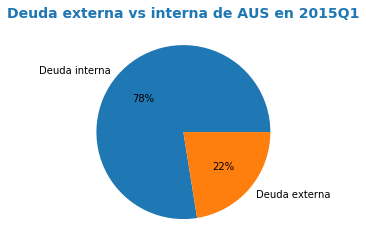

None


In [108]:
import matplotlib.pyplot as plt

def sectores_deuda_externa_interna(deudas, pais, fecha):
    ''' Función que dibuja un diagrama de sectores con la deuda interna y externa de un país y una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - tipo: Es una cadena con el tipo de deuda.
        - fecha: Es una cadena con el año y el trimestre.
    '''

    # Filtramos el país, la fecha y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (
        deuda.Fecha == fecha) & deuda.TipoId.isin(['Deuda interna', 'Deuda externa'])]
    # Creamos una serie de la columna Cantidad tomando como índice la columna del tipo de deuda.
    serie = pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.TipoId)
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de sectores
    serie.plot(kind='pie', autopct='%1.0f%%', ax=ax)
    # Añadimos el título
    ax.set_title('Deuda externa vs interna de ' + pais + ' en ' + fecha, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Eliminamos la etiqueta del eje y
    ax.set_ylabel('')
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
print(sectores_deuda_externa_interna(deuda, 'AUS', '2015Q1'))

9. Crear una función que reciba un país y una fecha, y dibuje un diagrama de barras con las cantidades de los distintos tipos de deudas de ese país en esa fecha.

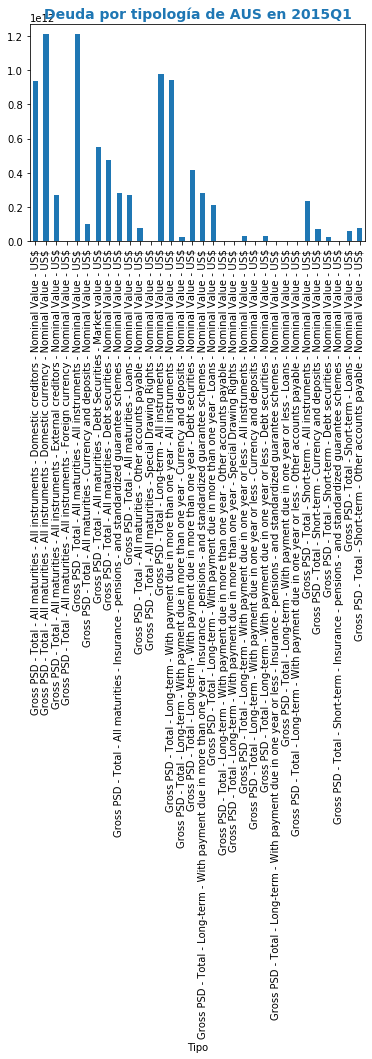

None


In [109]:
def barras_tipos_deuda(deuda, pais, fecha):
    ''' Función que dibuja un diagrama de barras con las cantidades de los distintos tipos de deudas de un país y una fecha dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - pais: Es una cadena con el nombre del país.
        - fecha: Es una cadena con el año y el trimestre.
    '''

    # Filtramos el país, la fecha y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.Fecha == fecha)]
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de barras
    deuda_filtro.plot(kind='bar', x='Tipo', y='Cantidad', ax=ax)
    # Añadimos el título
    ax.set_title('Deuda por tipología de ' + pais + ' en ' + fecha, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Eliminamos la leyenda
    ax.legend().remove()
    # Guardamos el gráfico.
    plt.show()
    return


# Ejemplo
print(barras_tipos_deuda(deuda, 'AUS', '2015Q1'))

10. Crear una función que reciba una lista de países y un tipo de deuda y dibuje un diagrama de líneas con la evolución de ese tipo de deuda de esos países (una línea por país).

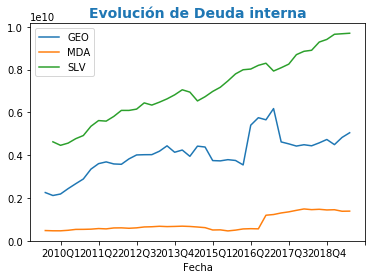

In [110]:
def evolucion_tipo_deuda(deuda, paises, tipo):
    ''' Función que dibuja un diagrama de líneas con la evolución de un tipo de deuda y una lista de países dados.
    
    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - paises: Es una lista de cadenas con los nombres de los países.
        - tipo: Es una cadena con el tipo de deuda.
    '''

    # Filtramos los países y el tipo de deuda
    deuda_filtro = deuda[(deuda.PaisId.isin(paises)) & (deuda.TipoId == tipo)]
    # Convertimos la fecha en el índice
    deuda_filtro.set_index('Fecha', inplace=True)
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de barras
    deuda_filtro.groupby('PaisId').Cantidad.plot(legend=True, ax=ax)
    # Añadimos el título
    ax.set_title('Evolución de ' + tipo, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
evolucion_tipo_deuda(deuda, ['GEO', 'SLV', 'MDA'], 'Deuda interna')

11. Crear una función que reciba un país y una lista de tipos de deuda y dibuje un diagrama de líneas con la evolución de esos tipos de deuda de ese país (una línea por tipo de deuda).

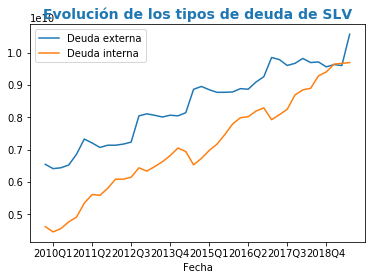

In [111]:
def evolucion_deuda_pais(deuda, pais, tipos):
    ''' Función que dibuja un diagrama de líneas con la evolución de unos tipos de deuda y un país dado.

    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - pais: Es un cadena con el nombre del país.
        - tipos: Es una lista de cadenas con los tipo de deuda.
    '''

    # Filtramos el país y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.TipoId.isin(tipos))]
    # Convertimos la fecha en el índice
    deuda_filtro.set_index('Fecha', inplace=True)
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de barras
    deuda_filtro.groupby('TipoId').Cantidad.plot(legend=True, ax=ax)
    # Añadimos el título
    ax.set_title('Evolución de los tipos de deuda de ' + pais, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    # Guardamos el gráfico.
    plt.show()
    return


# Ejemplo
evolucion_deuda_pais(deuda, 'SLV', ['Deuda interna', 'Deuda externa'])

12. Crear una función que reciba una lista de países y una lista de tipos de deuda, y dibuje un diagrama de cajas con las deudas de esos tipos de esos países (una caja por país y tipo de deuda).

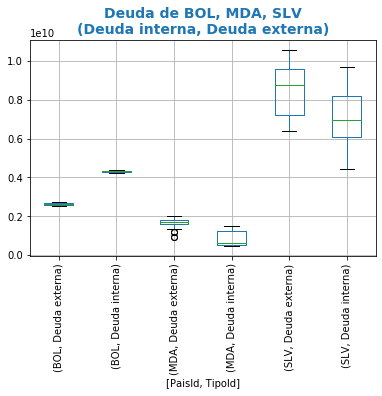

In [112]:
def cajas_deuda(deuda, paises, tipos):
    ''' Función que dibuja un diagrama de cajas con las deudas de unos tipos y unos países dados.

    Parámetros:
        - deuda: Es un DataFrame con las deudas de los países.
        - paises: Es una lista de cadenas con los nombres de los países.
        - tipos: Es una lista de cadenas con los tipo de deuda.
    '''

    # Filtramos el país y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId.isin(paises)) &
                         (deuda.TipoId.isin(tipos))]
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de cajas
    deuda_filtro.boxplot(column='Cantidad', by=['PaisId', 'TipoId'], ax=ax)
    # Añadimos el título
    ax.set_title('Deuda de ' + ', '.join(paises) + '\n(' + ', '.join(tipos) + ')',
                 loc="center", fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    plt.suptitle('')
    # Rotamos las etiquetas del eje x
    plt.xticks(rotation=90)
    # Guardamos el gráfico.
    plt.show()
    return


# Ejemplo
cajas_deuda(deuda, ['BOL', 'MDA', 'SLV'], ['Deuda interna', 'Deuda externa'])

13. Preprocesar el fichero del PIB crear un data frame con el país, la fecha y el PIB.

14. Crear una función que reciba un país y dibuje la evolución de la deuda pública total como porcentaje del PIB.

15. Crear una función que reciba un país devuelva un diccionario con los años y si el endeudamiento en esa fecha era insostenible. Se considera un endeudamiento insostenible si durante los tres años anteriores el porcentaje de deuda pública con respecto al PIB es superior al 20%.